# Pengumpulan Data

1.) Data yang digunakan yaitu dataset klasifikasi penyakit jantung yang dapat diakses di UCI melalui link: 
https://archive.ics.uci.edu/dataset/45/heart+disease . 

2.) Didalam dataset klasifikasi penyakit jantung, terdapat 4 database diantaranya adalah Hungarian, Cleveland, switzerland, VA-Long beach.
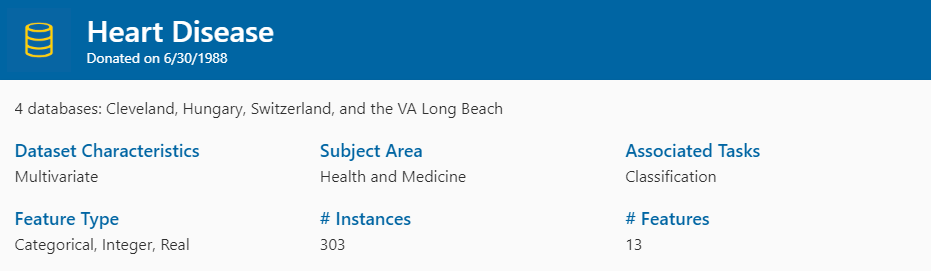

3.) Pada Penugasan Minggu 1 ini, dataset yang digunakan yaitu "Hungarian Data". Dataset terdiri dari 14 feature sebagai berikut:
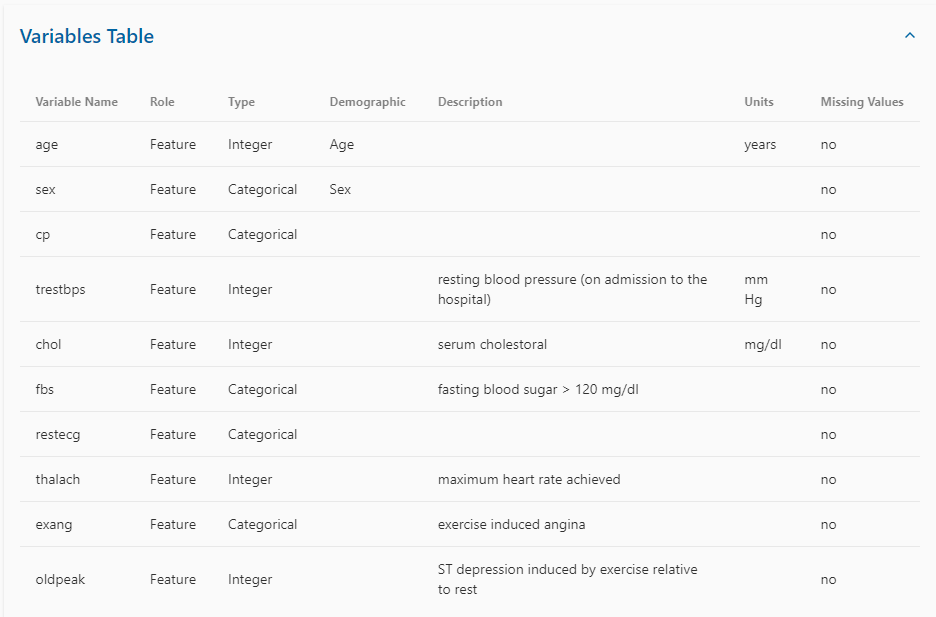
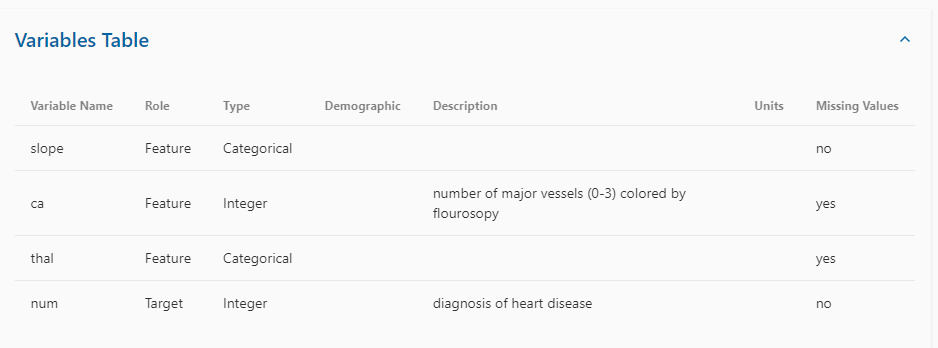


# Menelaah Data

Import library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
import re
import itertools

# Load Data

menginput dataset dan menyimpannya ke dalam variable "df"

In [8]:
data = 'hungarian.data'

membaca dataset

In [9]:
with open(data, encoding='Latin1') as file:
    lines = [line.strip() for line in file]
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

setelah membaca file dataset, dilakukan perulangan sebanyak kolom dan baris yang ada dalam dataset tersebut

In [10]:
data2 = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

In [11]:
df = pd.DataFrame.from_records(data2)

In [12]:
df.head() #menampilkan 5 data teratas

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [14]:
df.info() #menampilkan info yang ada pada dataset (jumlah kolom, jumlah missing values, tipe data, range-index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

 sebelum masuk ke dalam tahap validasi data, perlu dilakukannya penghapusan fitur untuk data bertipe object atau string.

In [15]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

tipe data pada file dataset diubah menjadi tipe data float. pada dataset, angka -9.0 mewakili nilai null.

In [16]:
df = df.astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

# Validasi Data

tahapan untuk mengetahui dan memahami isi dataset sehingga dapat melakukan tahapan berdasarkan kondisi

In [19]:
# data dengan nilai -9.0 dirubah menjadi null value sesuai dengan deskripsi pada dataset
df.replace(-9.0, np.nan, inplace=True)

In [20]:
df.isnull().sum() #menghitung jumlah null value

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [21]:
df.head

<bound method NDFrame.head of       1     2    3    4    5    6   7    8      9    10  ...  65   66   67  \
0    0.0  40.0  1.0  1.0  0.0  0.0 NaN  2.0  140.0  0.0  ... NaN  NaN  NaN   
1    0.0  49.0  0.0  1.0  0.0  0.0 NaN  3.0  160.0  1.0  ... NaN  NaN  NaN   
2    0.0  37.0  1.0  1.0  0.0  0.0 NaN  2.0  130.0  0.0  ... NaN  NaN  NaN   
3    0.0  48.0  0.0  1.0  1.0  1.0 NaN  4.0  138.0  0.0  ... NaN  2.0  NaN   
4    0.0  54.0  1.0  1.0  0.0  1.0 NaN  3.0  150.0  0.0  ... NaN  1.0  NaN   
..   ...   ...  ...  ...  ...  ...  ..  ...    ...  ...  ...  ..  ...  ...   
289  0.0  48.0  0.0  0.0  0.0  0.0 NaN  2.0    NaN  0.0  ... NaN  NaN  NaN   
290  0.0  36.0  1.0  1.0  0.0  0.0 NaN  2.0  120.0  0.0  ... NaN  NaN  NaN   
291  0.0  48.0  1.0  0.0  0.0  0.0 NaN  3.0  110.0  0.0  ... NaN  NaN  NaN   
292  0.0  47.0  0.0  0.0  0.0  0.0 NaN  2.0  140.0  1.0  ... NaN  NaN  NaN   
293  0.0  53.0  1.0  1.0  1.0  1.0 NaN  4.0  130.0  0.0  ... NaN  1.0  1.0   

      68   69   70   71   72  73 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

# Menentukan Object Data

memilih 14 feature yang akan digunakan berdasarkan pada deskripsi dataset

In [23]:
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 39, 42, 49, 56]]

In [25]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,NaN,NaN,NaN,0.0


In [26]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   40      104 non-null    float64
 10  43      4 non-null      float64
 11  50      28 non-null     float64
 12  57      294 non-null    float64
dtypes: float64(13)
memory usage: 30.0 KB


In [38]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

In [40]:
df_selected.rename(columns=column_mapping, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_5712\3799284956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [41]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   slope     104 non-null    float64
 10  ca        4 non-null      float64
 11  thai      28 non-null     float64
 12  target    294 non-null    float64
dtypes: float64(13)
memory usage: 30.0 KB


In [42]:
df_selected.value_counts() #menghitung jumlah feature dataset

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  slope  ca   thai  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    2.0    0.0  7.0   1.0       1
dtype: int64

# Membersihkan Data

melakukan cleaning data sebelum dilakukan pemodelan

In [43]:
df_selected.isnull().sum() #menghitung jumlah null values yang ada diddalam dataset

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
slope       190
ca          290
thai        266
target        0
dtype: int64

melakukan drop kolom jika data pada suatu feature terdapat missing values dengan jumlah -+ 90%

In [44]:
columns_to_drop = ['ca', 'slope','thai']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [45]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
target       0
dtype: int64

mengisi missing value di beberapa feature menggunakan mean dari setiap kolom

In [46]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [47]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [ ]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

In [50]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [51]:
dfClean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   target    294 non-null    float64
dtypes: float64(10)
memory usage: 23.1 KB


In [52]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
target      0
dtype: int64

In [53]:
#melakukan pengecekan duplikasi data
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0


In [54]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0


In [56]:
#penghapusan data yang memiliki duplikat
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target


In [57]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0


In [58]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

# Import Library

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
dfClean.corr() #menacri korelasi antar feature

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.571710
target,0.210429,0.220732,0.427536,0.214898,0.256027,0.154319,0.042643,-0.367525,0.571710,1.000000


<AxesSubplot:>

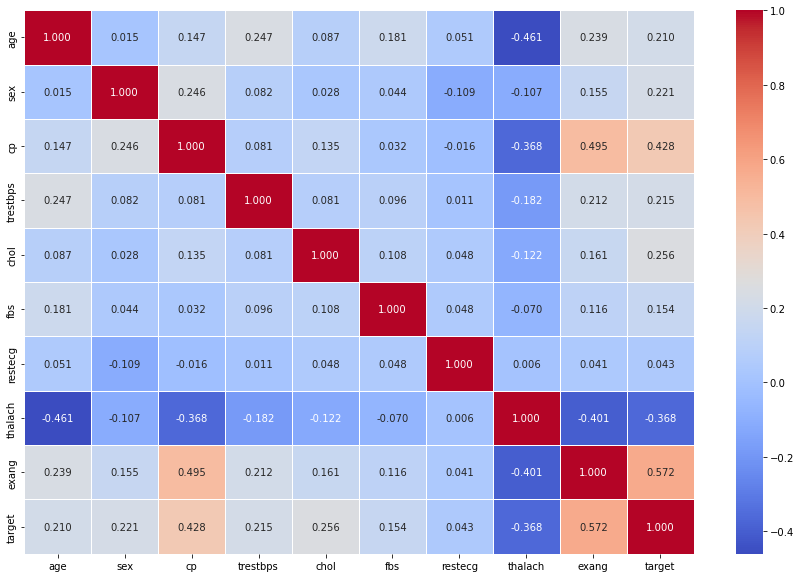

In [62]:
#membuat visualisasi
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f", cmap='coolwarm')